In [2]:
import sys
sys.path.append('../src/')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from blackjack_utils import simulation

Discrete Standing Strategy

In [6]:
avg_net_gains = []

for stand_value in range(12, 20):
    def fixed_stand_strategy(hands, deck, **kwargs):
        while hands[0].value() < stand_value:
            deck.deal(hands[0])
        
        return False
    
    all_net_gains = []
    
    for trials in range(10000):
        all_net_gains.append(simulation(fixed_stand_strategy))

    avg_net_gains.append(np.mean(all_net_gains))

print(avg_net_gains)

[np.float64(-10.11), np.float64(-8.82), np.float64(-10.63), np.float64(-8.13), np.float64(-6.35), np.float64(-8.48), np.float64(-10.8), np.float64(-20.25)]


Text(0.5, 1.0, 'Average Loss Per 100 Dollar Bet with Different Discrete Standing Values')

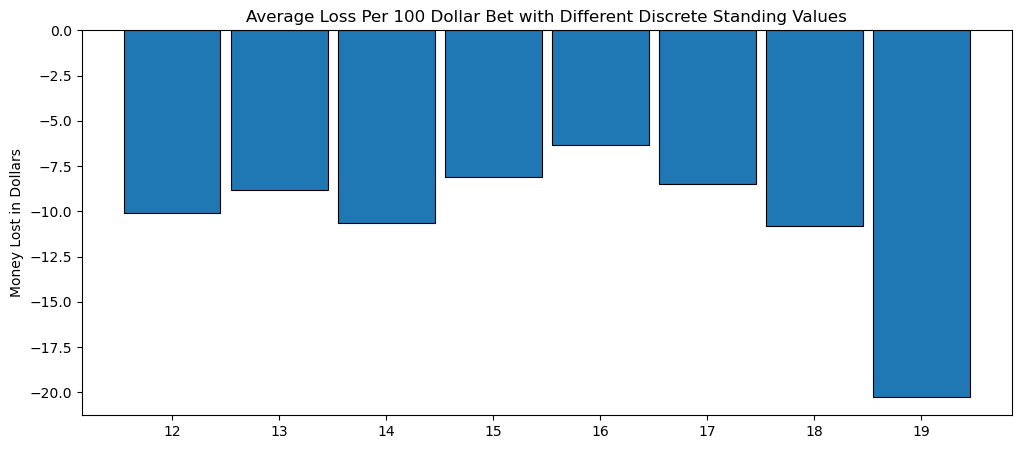

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(np.arange(12, 20), avg_net_gains, width=0.9, edgecolor="black", linewidth=0.8)
ax.set_ylabel('Money Lost in Dollars')
ax.set_title('Average Loss Per 100 Dollar Bet with Different Discrete Standing Values')

Stochastic Standing Strategy

In [8]:
avg_net_gains = []

# Define the standing values and probabilities to test
standing_values = [14, 15, 16, 17]
probabilities = [(0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]

# Loop through each combination of standing value and probability
for stand_value in standing_values:
    for hit_prob, stand_prob in probabilities:
        def stochastic_stand_strategy(hands, deck, **kwargs):
            while True:
                if hands[0].value() < stand_value:
                    if np.random.rand() < hit_prob:
                        deck.deal(hands[0])
                    else:
                        break
                elif hands[0].value() < 21:
                    if np.random.rand() < stand_prob:
                        deck.deal(hands[0])
                    else:
                        break
                else:
                    break
                    
            return False
        
        all_net_gains = []
        
        for trials in range(10000):
            all_net_gains.append(simulation(stochastic_stand_strategy))
        
        avg_net_gains.append(np.mean(all_net_gains))

print(avg_net_gains)

[np.float64(-21.08), np.float64(-18.64), np.float64(-12.82), np.float64(-23.39), np.float64(-18.13), np.float64(-13.4), np.float64(-23.58), np.float64(-17.45), np.float64(-10.96), np.float64(-24.18), np.float64(-17.91), np.float64(-14.12)]


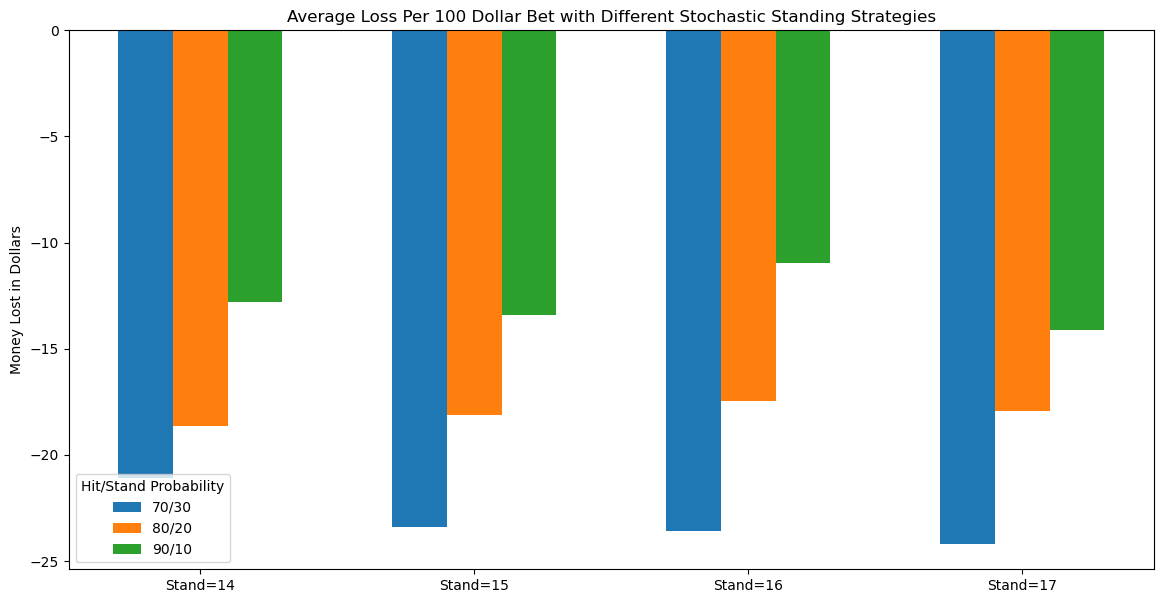

In [11]:
prob_labels = ["70/30", "80/20", "90/10"]

fig, ax = plt.subplots(figsize=(14, 7))

# Number of bars per group
num_bars_per_value = len(probabilities)
total_bars = len(standing_values) * num_bars_per_value
bar_width = 0.2
x = np.arange(len(standing_values))

# Grouped bar chart
for i, prob_label in enumerate(prob_labels):
    offset = i * bar_width
    bar_positions = x + offset - bar_width * (num_bars_per_value - 1) / 2
    bar_heights = avg_net_gains[i::num_bars_per_value]
    ax.bar(bar_positions, bar_heights, bar_width, label=prob_label)

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels([f'Stand={sv}' for sv in standing_values])

# Set labels and title
ax.set_ylabel('Money Lost in Dollars')
ax.set_title('Average Loss Per 100 Dollar Bet with Different Stochastic Standing Strategies')
ax.legend(title='Hit/Stand Probability')